### Imported Libraries

In [7]:
import pandas as pd
print('pandas version: %s' % (pd.__version__))
import numpy as np
print('numpy version: %s' % (np.__version__))
import regex as re
print('regex version: %s' % (re.__version__))
import imblearn
print('imblearn version: %s' % imblearn.__version__)
import sklearn
print('sklearn version: %s' % sklearn.__version__)



print()
import sys
print('python version: %s' % (sys.version))

pandas version: 1.1.3
numpy version: 1.19.2
regex version: 2.5.86
imblearn version: 0.7.0
sklearn version: 0.23.2

python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
import seaborn as sns

from collections import Counter

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
#sns.set_theme(style="darkgrid")
#sns.set_theme(style='white')

### User Functions

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [4]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

def generate_auc_roc_curve(clf, X_test, y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [5]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

def generate_roc_curve(clf, X_test, y_test):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    plt.title('ROC Curve')
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    plt.show()

### Read in Data

In [8]:
df = pd.read_csv('../raw/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.shape

(284807, 31)

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# Class column represents fraudulent data, where 0 = not fraudulent and 1 = fraudulent
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

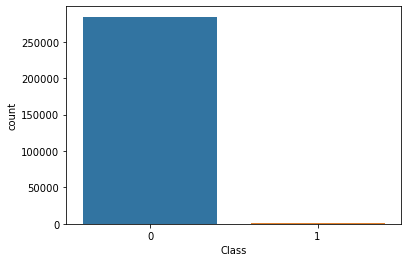

In [13]:
sns.countplot(x=df.Class, data=df)

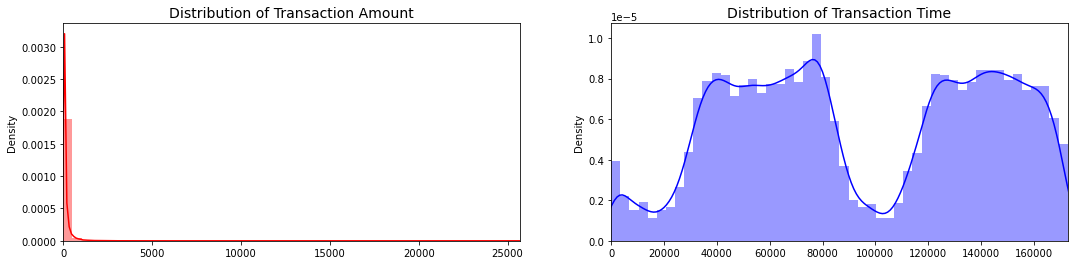

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = df['Time'].values
amount_val = df['Amount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Distribution of Transaction Amount by Class

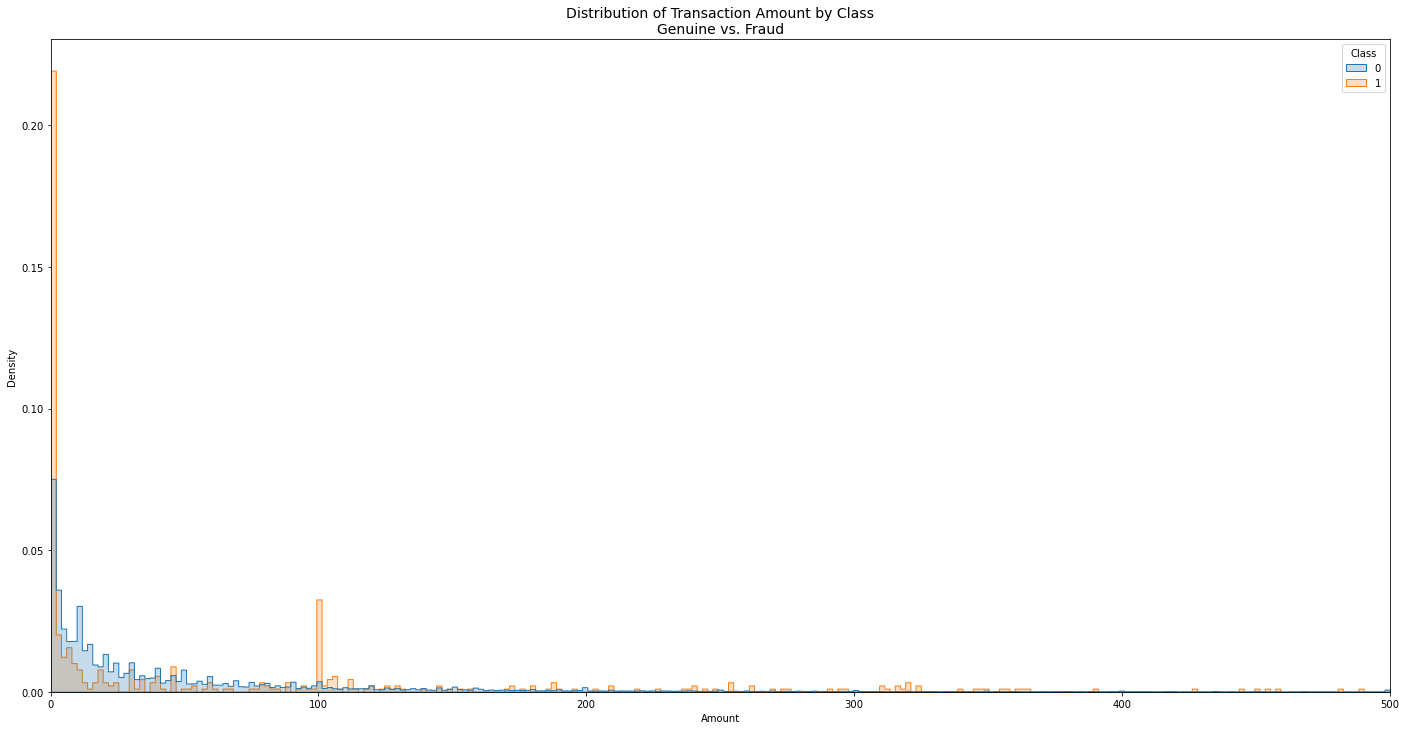

Wall time: 394 ms


In [63]:
%%time

#df[df.Amount <= 500]

data = df[df.Amount <= 500]

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=data, x="Amount",hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(data.Amount), max(data.Amount)]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Amount by Class\nGenuine vs. Fraud', fontsize=14)
#plt.legend(['fraud','genuine'])
#plt.tight_layout()
plt.show()

## Preprocessing, Scale data

In [ ]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
minmax_scaler = preprocessing.MinMaxScaler()

time_raw = df.Time.values.reshape(-1,1)                                   # perform the different scaling
time_standard_scaled = standard_scaler.fit_transform(time_raw)
time_robust_scaled = robust_scaler.fit_transform(time_raw)

amount_raw = df.Amount.values.reshape(-1,1)
amount_standard_scaled = standard_scaler.fit_transform(amount_raw)
amount_robust_scaled = robust_scaler.fit_transform(amount_raw)

time_compare = pd.DataFrame(                                               # to see scaling side-by-side if desired
    {
    'time_raw' : time_raw.reshape(1,-1)[0],
    'time_standard_scaled' : time_standard_scaled.reshape(1,-1)[0],
    'time_robust_scaled' : time_robust_scaled.reshape(1,-1)[0]
}
)

amount_compare = pd.DataFrame(
    {
    'amount_raw' : amount_raw.reshape(1,-1)[0],
    'amount_standard_scaled' : amount_standard_scaled.reshape(1,-1)[0],
    'amount_robust_scaled' : amount_robust_scaled.reshape(1,-1)[0]
}
)

df['time_robust_scaled'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))         # update dataframe
df['amount_robust_scaled'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))     
df.drop(['Time','Amount'], axis=1, inplace=True)

time_robust_scaled_df = df['time_robust_scaled']                                                # move scaled columns to front of data frame
amount_robust_scaled_df = df['amount_robust_scaled']
df.drop(['time_robust_scaled', 'amount_robust_scaled'], axis=1, inplace=True)                  
df.insert(0, 'time_robust_scaled', time_robust_scaled_df)
df.insert(1, 'amount_robust_scaled', amount_robust_scaled_df)

#amount_scaled = scaler.fit_transform(df.Amount)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = df['time_robust_scaled'].values
amount_val = df['amount_robust_scaled'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Scaled Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Scaled Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [ ]:
df.head()

### Distribution Tables

In [ ]:
df.Time

In [ ]:
df.Amount

In [ ]:
df

In [ ]:
amount_compare